# NBA Player Stats 

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import seaborn as sns
import csv
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

Above you can see the imports needed for manipulating this NBA Player Stats dataset. 
Pandas is used to handle the data. 
Matplotlib is used for plotting and creating graphs.
Numpy is used to process arrays.
Random is a random number generator.

IPython.display will allow me to manipulate the CSS so I can display data side by side rather than above and below each other.

In [2]:
%matplotlib inline

This function allows us to display graphs inline

In [3]:
NBAPlayerStats = pd.read_csv('nbaPlayerStats.csv')
NBAPlayerStats.head(10)

,Player,Status,Pos,fg_pct,avg_dist,FG,FGA,3P,3PA,2P,...,PTS,TS%,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%
0,A.J. Price,Inactive,PG,0.380,18.3,7.2,18.8,2.8,9.0,4.3,...,19.8,0.486,0.193,1.9,8.7,5.3,23.6,1.6,0.2,12.8
1,Aaron Brooks,Active,PG,0.413,15.2,8.6,20.9,3.1,8.5,5.5,...,23.9,0.525,0.200,2.1,6.9,4.5,23.7,1.4,0.5,14.4
2,Aaron Gordon,Active,PF,0.460,11.4,7.7,16.7,1.3,4.6,6.3,...,20.0,0.533,0.285,6.9,17.4,12.0,9.7,1.5,1.9,9.4
3,Aaron Gray,Inactive,C,0.509,3.9,6.0,11.8,0.0,0.0,6.0,...,14.5,0.528,0.383,12.9,23.1,18.0,8.4,1.3,1.8,20.8
4,Adreian Payne,Active,PF,0.399,11.5,6.2,15.6,0.5,2.1,5.7,...,15.2,0.444,0.217,6.4,19.6,13.0,7.5,1.6,1.6,16.1
5,Al Harrington,Inactive,PF,0.445,12.2,9.3,20.8,1.8,5.1,7.5,...,24.4,0.523,0.268,6.1,16.4,11.2,10.1,1.6,0.7,12.7
6,Al Horford,Active,C,0.528,10.1,9.4,17.9,0.5,1.4,9.0,...,22.3,0.568,0.216,8.0,22.0,15.0,15.1,1.3,2.8,11.2
7,Al Jefferson,Active,C,0.499,7.8,12.2,24.4,0.0,0.1,12.1,...,28.3,0.527,0.230,9.0,25.1,16.9,9.7,1.2,3.3,8.2
8,Al-Farouq Aminu,Active,SF,0.426,11.5,5.8,13.5,1.3,3.9,4.5,...,15.5,0.511,0.279,6.6,20.4,13.5,7.7,2.0,2.0,15.3
9,Alan Anderson,Active,SF,0.405,16.2,6.5,16.0,2.5,7.4,3.9,...,18.6,0.526,0.238,2.6,9.7,6.1,8.8,1.4,0.4,11.2


Above we are importing the file from which we are getting our data. We have stored the data in NBAPlayerStats and only show the top 10 rows of the data. At the moment the data is being shown in alphabetical order of the players first name. We also have inactive players as shown by the Status column. Inactive players are mainly retired players, but could also be ones who are injured, or for another reason are no longer playing in the NBA. We will get the table to show only active players below.

## The Data

In [4]:
is_active = NBAPlayerStats[NBAPlayerStats['Status'] == 'Active']
is_active.head()

,Player,Status,Pos,fg_pct,avg_dist,FG,FGA,3P,3PA,2P,...,PTS,TS%,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%
1,Aaron Brooks,Active,PG,0.413,15.2,8.6,20.9,3.1,8.5,5.5,...,23.9,0.525,0.200,2.1,6.9,4.5,23.7,1.4,0.5,14.4
2,Aaron Gordon,Active,PF,0.460,11.4,7.7,16.7,1.3,4.6,6.3,...,20.0,0.533,0.285,6.9,17.4,12.0,9.7,1.5,1.9,9.4
4,Adreian Payne,Active,PF,0.399,11.5,6.2,15.6,0.5,2.1,5.7,...,15.2,0.444,0.217,6.4,19.6,13.0,7.5,1.6,1.6,16.1
6,Al Horford,Active,C,0.528,10.1,9.4,17.9,0.5,1.4,9.0,...,22.3,0.568,0.216,8.0,22.0,15.0,15.1,1.3,2.8,11.2
7,Al Jefferson,Active,C,0.499,7.8,12.2,24.4,0.0,0.1,12.1,...,28.3,0.527,0.230,9.0,25.1,16.9,9.7,1.2,3.3,8.2


As discussed above, we have filtered the data to show only players with an active status and stored it in is_active. 

In [5]:
is_active.Pos.unique()

array(['PG', 'PF', 'C', 'SF', 'SG'], dtype=object)

Here we have determined that there is a total of 5 positions that a player can be in the NBA. 

In [6]:
PG_count = is_active.Pos.value_counts()['PG']
PF_count = is_active.Pos.value_counts()['PF']
C_count = is_active.Pos.value_counts()['C']
SF_count = is_active.Pos.value_counts()['SF']
SG_count = is_active.Pos.value_counts()['SG']

print(f"""There is a total of 
{PG_count} Point Guards, """)
print(f"{PF_count} Power Forwards, ")
print(f"{C_count} Centers,")
print(f"{SF_count} Small Forwards,")
print(f"and {SG_count} Shooting Guards.")

There is a total of 
88 Point Guards, 
79 Power Forwards, 
80 Centers,
79 Small Forwards,
and 92 Shooting Guards.


Here we have determined of all the active players, how many are playing in each position. 
The most played position in the NBA is a shooting guard, with second place being a point guard.

This is interesting as the point guard, or PG, is considered the most important posistion a player can play, as the main role of a PG is to direct the teams offence on the basketball court.

The shooting guards, or SG, is considered to be the second most important posistion a player can play. The main role of a SG being to score points for the team

From this data we can imply that either more players tend to play as a SG as they do not want the responsibilty of being a PG, or that teams tend to sign more shooting guards because of their scoring ability.

In [7]:
is_pg = is_active[is_active['Pos'] == 'PG']
is_sg = is_active[is_active['Pos'] == 'SG']

Above we have filtered the data again to show the players that have the position of PG(Point Guard) and stored it in is_pg. I have also done with with the posistion of SG(Shooting Guard) and stored it in is_sg.

In [8]:
is_pg = is_pg.sort_values(by="PTS", ascending = False)
is_sg = is_sg.sort_values(by="PTS", ascending = False)

I have now sorted the data of both is_pg and is_sg to sort the data by the most number of PTS(points) a player has scored in descending order. 

In [9]:
is_pg = is_pg[['Player', 'fg_pct', 'FGA', 'PTS', '3P', '3PA']]
is_pg.head(10)

,Player,fg_pct,FGA,PTS,3P,3PA
552,Russell Westbrook,0.433,26.9,33.8,1.6,5.0
389,Kyrie Irving,0.457,26.0,32.5,2.9,7.5
587,Stephen Curry,0.476,23.9,32.4,4.7,10.8
241,Isaiah Thomas,0.443,23.3,32.0,3.3,9.0
121,Damian Lillard,0.430,24.4,31.3,3.7,9.9
154,Derrick Rose,0.451,25.1,29.0,1.2,3.9
358,Kemba Walker,0.411,23.7,27.9,2.7,7.7
99,Chris Paul,0.473,20.6,27.6,1.8,4.8
618,Tony Parker,0.493,21.8,27.0,0.7,2.2
319,John Wall,0.433,22.2,26.5,1.2,3.7


I have changed the is_pg data so that it only shows the Player, fg_pct(Field Goal Percentage), FGA(Field Goals Attempted) and PTS(points). 

In [10]:
is_sg = is_sg[['Player', 'fg_pct', 'FGA', 'PTS', '3P', '3PA']]
is_sg.head(10)

,Player,fg_pct,FGA,PTS,3P,3PA
181,Dwyane Wade,0.484,26.1,34.8,0.7,2.5
260,James Harden,0.442,21.9,32.9,3.3,9.2
647,Vince Carter,0.434,24.8,30.0,2.5,6.7
145,DeMar DeRozan,0.446,23.4,29.4,0.6,2.2
73,C.J. McCollum,0.459,24.3,29.4,3.3,8.0
375,Klay Thompson,0.453,23.6,28.9,4.3,10.3
406,Lou Williams,0.417,21.5,28.1,2.7,7.7
418,Manu Ginobili,0.447,20.2,27.8,2.9,8.0
158,Devin Booker,0.423,22.9,27.7,2.5,6.9
59,Bradley Beal,0.441,22.5,26.9,3.1,7.8


I have done the same with the is_sg data that I have done with the is_pg data and show only the Player, fg_pct(Field Goal Percentage), FGA(Field Goals Attempted) and PTS(points).

In [11]:
display(is_pg.head(10))
display(is_sg.head(10))

,Player,fg_pct,FGA,PTS,3P,3PA
552,Russell Westbrook,0.433,26.9,33.8,1.6,5.0
389,Kyrie Irving,0.457,26.0,32.5,2.9,7.5
587,Stephen Curry,0.476,23.9,32.4,4.7,10.8
241,Isaiah Thomas,0.443,23.3,32.0,3.3,9.0
121,Damian Lillard,0.430,24.4,31.3,3.7,9.9
154,Derrick Rose,0.451,25.1,29.0,1.2,3.9
358,Kemba Walker,0.411,23.7,27.9,2.7,7.7
99,Chris Paul,0.473,20.6,27.6,1.8,4.8
618,Tony Parker,0.493,21.8,27.0,0.7,2.2
319,John Wall,0.433,22.2,26.5,1.2,3.7


,Player,fg_pct,FGA,PTS,3P,3PA
181,Dwyane Wade,0.484,26.1,34.8,0.7,2.5
260,James Harden,0.442,21.9,32.9,3.3,9.2
647,Vince Carter,0.434,24.8,30.0,2.5,6.7
145,DeMar DeRozan,0.446,23.4,29.4,0.6,2.2
73,C.J. McCollum,0.459,24.3,29.4,3.3,8.0
375,Klay Thompson,0.453,23.6,28.9,4.3,10.3
406,Lou Williams,0.417,21.5,28.1,2.7,7.7
418,Manu Ginobili,0.447,20.2,27.8,2.9,8.0
158,Devin Booker,0.423,22.9,27.7,2.5,6.9
59,Bradley Beal,0.441,22.5,26.9,3.1,7.8


Here you can see the top 5 rows of both is_pg & is_sg. These top 5 players are shown based off their most points scored. 

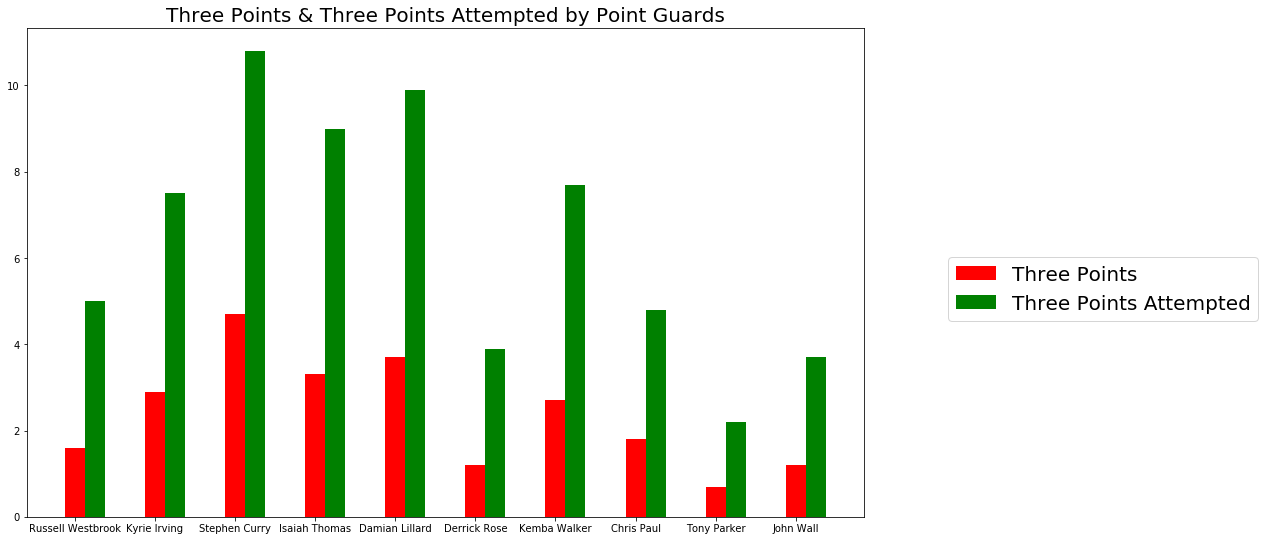

In [18]:
Players = np.asarray(is_pg['Player'])
ThreePoints = np.asarray(is_pg['3P'])
ThreePointsAttempted = np.asarray(is_pg['3PA'])

x = np.arange(10)
plt.title("Three Points & Three Points Attempted by Point Guards", fontsize = 20)
plt.bar(x + 0.00, ThreePoints[:10], color = "r", width = 0.25, label="Three Points")
plt.bar(x + 0.25, ThreePointsAttempted[:10], color = "g", width = 0.25, label="Three Points Attempted")
plt.rcParams['figure.figsize']=[15,9]
plt.legend(fontsize = 20, loc = (1.1, 0.4))
plt.xticks(x, Players)

plt.show()

Here I have gotten the data of the 3 points & 3 points attempted of the Points Guards with the most points scored. This was the top 10 Point Guards. I stored both the 3 points & 3 points attempted into 2 seperate arrays. I then plotted them together on a group graph, with the relevant players that earned those stats.

From this table we can see here that Stephen Curry has the most 3 points attempted and the most 3 points scored. This is quite interesting considering that Stephen Curry has only scored a total of 32.4 points which is less than Kyrie Irving and Russell Westbrook. However these players have less 3 points scored and 3 points attempted but still manage to have a higher Points scored. 

Does this say something about the accuray of Stephen Currys shot. From this data we can interpret that although Steph Curry has more 3 points scored and attempted, his shot from the 3 point line may not be that accurate. However, we have not taken into account the number of 2 points he has scored and attempted. As Russell Westbrook and Kyrie Irving have less 3 points scored and attempted, as this is the easiest type of shot, we can assume they have a higher 2 points scored and attempted. Scoring 2 points more frequently than 3 points, will have given them the extra points we can see on the table and graph. 

This may improve Stephen Currys case, as he may not have scored many 2 points or attempted as many. But to be 3rd place in total points scored with a high 3 points scored & attempted and an assumed low 2 points scored & attempted, Stephen Curry had proven himself to be a dangerous player within the NBA and will be unstopbable if he is able to somehow get his total points scored even higher.

In [13]:
display(is_pg.head(10))

,Player,fg_pct,FGA,PTS,3P,3PA
552,Russell Westbrook,0.433,26.9,33.8,1.6,5.0
389,Kyrie Irving,0.457,26.0,32.5,2.9,7.5
587,Stephen Curry,0.476,23.9,32.4,4.7,10.8
241,Isaiah Thomas,0.443,23.3,32.0,3.3,9.0
121,Damian Lillard,0.430,24.4,31.3,3.7,9.9
154,Derrick Rose,0.451,25.1,29.0,1.2,3.9
358,Kemba Walker,0.411,23.7,27.9,2.7,7.7
99,Chris Paul,0.473,20.6,27.6,1.8,4.8
618,Tony Parker,0.493,21.8,27.0,0.7,2.2
319,John Wall,0.433,22.2,26.5,1.2,3.7


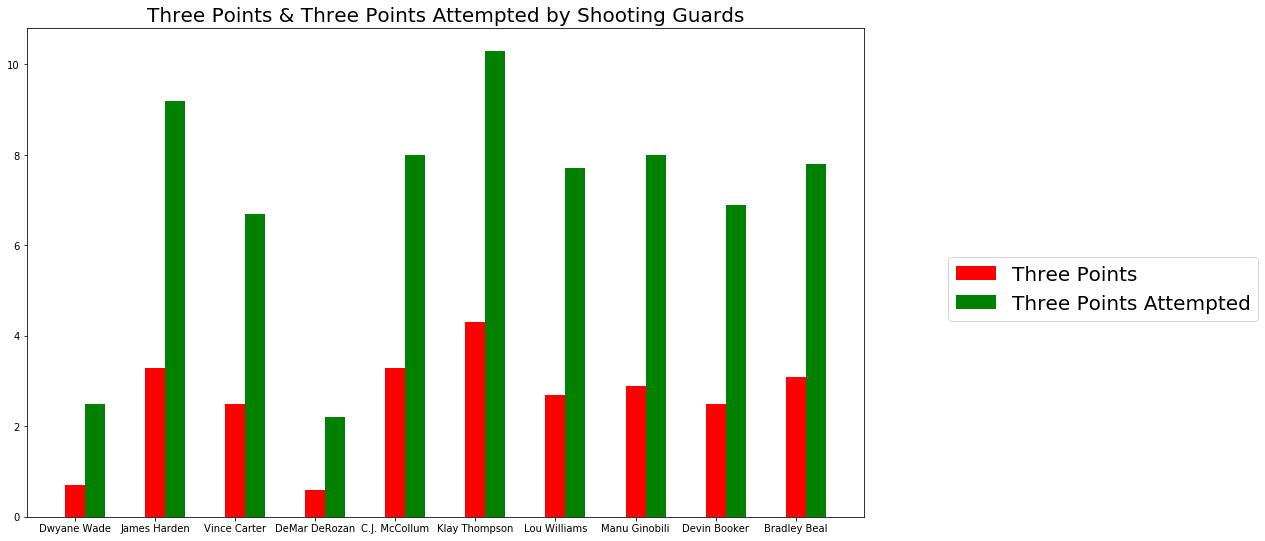

In [14]:
Players = np.asarray(is_sg['Player'])
ThreePoints = np.asarray(is_sg['3P'])
ThreePointsAttempted = np.asarray(is_sg['3PA'])

x = np.arange(10)
plt.title("Three Points & Three Points Attempted by Shooting Guards", fontsize = 20)
plt.bar(x + 0.00, ThreePoints[:10], color = "r", width = 0.25, label="Three Points")
plt.bar(x + 0.25, ThreePointsAttempted[:10], color = "g", width = 0.25, label="Three Points Attempted")
plt.rcParams['figure.figsize']=[15,9]
plt.legend(fontsize = 20, loc = (1.1, 0.4))
plt.xticks(x, Players)

plt.show()

Here I have gotten the data of the 3 points & 3 points attempted of the Shooting Guards with the most points scored. This was the top 10 Shooting Guards. I stored both the 3 points & 3 points attempted into 2 seperate arrays. I then plotted them together on a group graph, with the relevant players that earned those stats.

From this table, we can see that Klay Thompson clearly has the most 3 points scored and attempted. However, Klay Thompson is only 6th highest in points scored, as shown in the table below, which is a very similar situation that we determined with Stephen Curry above. That being having a high 3 points scored and attempted but not being the first in points scored in their positions. 

We can assume a similar situation with Klay as we did with Stephen. This being the accuracy of Klay Thompsons shot. As Klay is lower on the list for points scored than Stephen was, we can assume that Klay's shot is less accurate than Stephen's. However again, we are not taking into account the number of 2 points scored and attempted by the top 10 shooting guards. As the players above Klay, especially DeMar DeRozan and Dywane Wade, who have the lowest 3 points scored and attempted, we can assume they have a higher 2 pts scored and attempted as that is an easier type of shot to score. Again, scoring 2 points more frequently than 3 points, will have given them the advantage to score more points than Klay. 

James Harden seems to be an anomally however, as he has the 2nd highest 3 points scored, tied with C.J. McCollum, and the 2nd highest 3 points attempted, and yet he has a higher points scored than Klay. This must mean that James Harden has a much more accurate shot from the 3 point line compared to Klay Thompson.

Klay Thompson may need to work a lot harder on his 3 point game, in training, in order to be higher on the list in points scored for the top 10 shooting guards. While he does that, he should focus more on scoring 2 pointers while in game as it is the easiest type of shot and should help him gain some extra points to push him up the leaderboard. 

In [15]:
display(is_sg.head(10))

,Player,fg_pct,FGA,PTS,3P,3PA
181,Dwyane Wade,0.484,26.1,34.8,0.7,2.5
260,James Harden,0.442,21.9,32.9,3.3,9.2
647,Vince Carter,0.434,24.8,30.0,2.5,6.7
145,DeMar DeRozan,0.446,23.4,29.4,0.6,2.2
73,C.J. McCollum,0.459,24.3,29.4,3.3,8.0
375,Klay Thompson,0.453,23.6,28.9,4.3,10.3
406,Lou Williams,0.417,21.5,28.1,2.7,7.7
418,Manu Ginobili,0.447,20.2,27.8,2.9,8.0
158,Devin Booker,0.423,22.9,27.7,2.5,6.9
59,Bradley Beal,0.441,22.5,26.9,3.1,7.8


In [16]:
Players = []
Points = []

SGPlayers = np.asarray(is_sg['Player'])
SGPlayers = SGPlayers[0:10]

PGPlayers = np.asarray(is_pg['Player'])
PGPlayers = PGPlayers[0:10]

Players.extend(SGPlayers)
Players.extend(PGPlayers)

SGPoints = np.asarray(is_sg['PTS'])
SGPoints = SGPoints[0:10]

PGPoints = np.asarray(is_pg['PTS'])
PGPoints = PGPoints[0:10]

Points.extend(SGPoints)
Points.extend(PGPoints)

display(Players, Points)

['Dwyane Wade',
 'James Harden',
 'Vince Carter',
 'DeMar DeRozan',
 'C.J. McCollum',
 'Klay Thompson',
 'Lou Williams',
 'Manu Ginobili',
 'Devin Booker',
 'Bradley Beal',
 'Russell Westbrook',
 'Kyrie Irving',
 'Stephen Curry',
 'Isaiah Thomas',
 'Damian Lillard',
 'Derrick Rose',
 'Kemba Walker',
 'Chris Paul',
 'Tony Parker',
 'John Wall']

[34.8,
 32.9,
 30.0,
 29.4,
 29.4,
 28.9,
 28.1,
 27.8,
 27.7,
 26.9,
 33.8,
 32.5,
 32.4,
 32.0,
 31.3,
 29.0,
 27.9,
 27.6,
 27.0,
 26.5]

Here I have combined the top 10 point guards and shooting guards into one array. I have also done this with the points. 

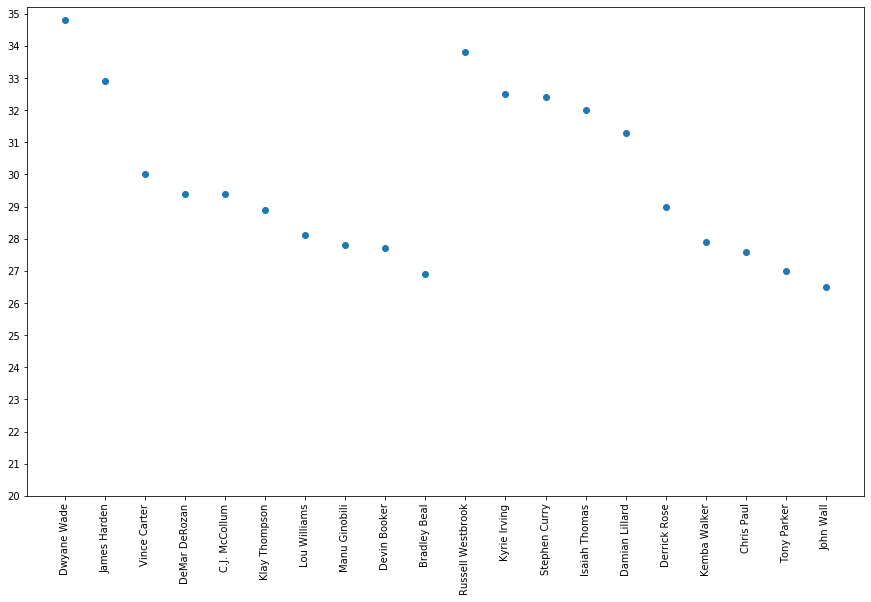

In [17]:
plt.scatter(Players, Points)
plt.xticks(rotation = 'vertical')
plt.yticks([20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  30, 31, 32, 33, 34, 35])
plt.show()

This graph above shows the top 20 players based off their points scored. These players consist of just point guards and shooting guards. 

From Dwayne Wade to Bradley Beal, we have the shooting guards and from Russell Westbrook to John Wall, we have the point guards. 

From first glance we can instantly see that the point guards have a higher average of points scored than the shooting guards. Does this mean that point guards are more valuable players as they tend to consistenly score higher amounts of points thoughout the season. 

We have also been talking about Stephen Curry and Klay Thompson and as we can see from this graph, Stephen Curry has a higher points scored than Klay Thompson. We assumed this above and this graph has confirmed it.

From this graph I can also notice that James Harden has a very similar amounts of points scored to Stephen Curry. James Harden can pose a threat to Stephen Curry if Stephen slacks at any point in time with his 2 point and 3 point shots. On the other hand, Klay Thompson needs do some serious work if he wants to be a threat to Stephen, James and the rest of the leauge. 